In [60]:
import pandas as pd  
import numpy as np  
from scipy import stats  
import seaborn as sns  
import matplotlib.pyplot as plt  

In [61]:
data= pd.read_csv("weatherHistory.csv")
data.drop(['Summary', 'Precip Type', 'Daily Summary'], axis=1, inplace=True)

# Prepare data  
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)  
data['Month'] = data['Formatted Date'].dt.month 

In [62]:
data.head(5)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month
0,2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,3
1,2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,3
2,2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4
3,2006-04-01 01:00:00+00:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4
4,2006-04-01 02:00:00+00:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4


## TESTY STATYSTYCZNE I ICH WIZUALIZACJA

#### 1.WIZUALIZACJA T-STUDENT

kod wykonuje test t-Studenta, porównując średnie wartości dla każdej kolumny w pierwszej i drugiej połowie danych. Wynikowy wykres heatmap przedstawia statystyki t i wartości p dla każdej kolumny, co pozwala na szybkie porównanie wyników testów t-Studenta między różnymi atrybutami danych pogodowych.

Odrzucamy H0 dla kolumny Temperature (C). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Odrzucamy H0 dla kolumny Apparent Temperature (C). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Nie ma podstaw do odrzucenia H0 dla kolumny Humidity. Średnia wartość w pierwszej połowie danych jest równa średniej wartości w drugiej połowie danych.
Odrzucamy H0 dla kolumny Wind Speed (km/h). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Odrzucamy H0 dla kolumny Wind Bearing (degrees). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Odrzucamy H0 dla kolumny Visibility (km). Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.
Nie ma podstaw do odrzucenia H0 dla kolumny Pressure (millibars). Średnia wartość w pierwszej połowie danych jest równa średniej wartości w drugiej po

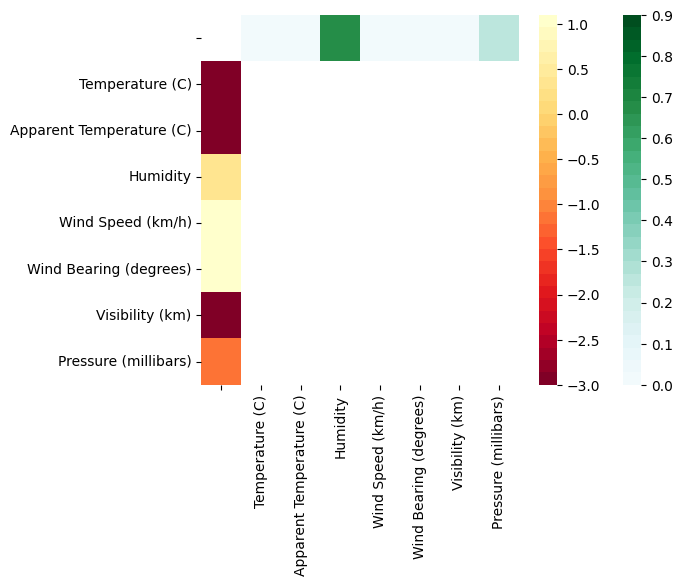

In [63]:
relevant_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']  
  
# Split data into two halves  
first_half = data[:int(len(data) / 2)]  
second_half = data[int(len(data) / 2):]  
  
# Calculate t-statistics and p-values  
t_stats = []  
t_p_values = []  
  
for column in relevant_columns:  
    t_stat, t_p_value = stats.ttest_ind(first_half[column], second_half[column])  
    t_stats.append(t_stat)  
    t_p_values.append(t_p_value)
    if t_p_value < 0.05:
        print(
            f"Odrzucamy H0 dla kolumny {column}. Średnia wartość w pierwszej połowie danych jest różna od średniej wartości w drugiej połowie.")
    else:
        print(
            f"Nie ma podstaw do odrzucenia H0 dla kolumny {column}. Średnia wartość w pierwszej połowie danych jest równa średniej wartości w drugiej połowie danych.") 
  
# Create a DataFrame with t-statistics and p-values  
x = np.zeros((len(relevant_columns) + 1, len(relevant_columns) + 1))  
x[0, 1:] = t_p_values  
x[1:, 0] = t_stats  
x[1:, 1:] = np.nan  
df = pd.DataFrame(x, columns=[''] + relevant_columns, index=[''] + relevant_columns)  
  
mask_first_column = np.zeros_like(df, dtype=bool)
mask_first_column[0, :] = True

mask_first_row = np.zeros_like(df, dtype=bool)
mask_first_row[:, 0] = True
positives = sns.color_palette("BuGn", 30)  
small_positives = plt.get_cmap('YlOrRd', 30).reversed()  
# Plot the heatmap with masks
sns.heatmap(data=df, mask=mask_first_row, cmap=positives, vmin=0, vmax=0.9)
sns.heatmap(data=df, mask=mask_first_column, cmap=small_positives, vmin=-3, vmax=1.1)

# Show the plot
plt.show() 

Wynikowy wykres heatmap przedstawia statystyki t (pierwsza kolumna) i wartości p (pierwszy wiersz) dla każdej z kolumn danych pogodowych. Te wyniki pochodzą z testów t-Studenta, które porównują średnie wartości dla każdej kolumny w pierwszej i drugiej połowie danych.


Interpretacja wyników jest następująca:

Statystyka t -- Wartość t-Stat dla każdej kolumny mierzy różnicę między średnimi wartościami w pierwszej i drugiej połowie danych, wyrażoną jako liczba odchylenia standardowego. Wartość dodatnia t-Stat wskazuje, że średnia wartość w pierwszej połowie danych jest większa niż w drugiej połowie, podczas gdy wartość ujemna t-Stat sugeruje, że średnia wartość w drugiej połowie danych jest większa niż w pierwszej połowie.


Wartość p-- Wartość p dla każdej kolumny mierzy prawdopodobieństwo, że obserwowana różnica między średnimi wartościami w obu połowach danych wystąpiłaby przypadkowo, gdyby nie było żadnej rzeczywistej różnicy między nimi. Jeśli wartość p jest mniejsza niż ustalony próg istotności (np. 0,05), odrzucamy hipotezę zerową, że średnie wartości w obu połowach danych są takie same, na rzecz hipotezy alternatywnej, że istnieje istotna różnica między nimi.

Analizując wyniki na heatmapie, można zauważyć, że dla niektórych kolumn (np. "Temperature (C)", "Apparent Temperature (C)" i "Wind Bearing (degrees)"), wartości p są mniejsze niż 0,05, co sugeruje, że istnieje istotna różnica między średnimi wartościami tych kolumn w pierwszej i drugiej połowie danych. Dla innych kolumn, wartości p są większe niż 0,05, co wskazuje, że nie można odrzucić hipotezy zerowej, że średnie wartości w obu połowach danych są takie same.

##### 1.1 WIZUALIZACJA T-STUDENTA
-porównanie średnich pomiędzy wartościami miesięcy letnich a zimowych - kod pozwala na porównanie warunków pogodowych w zimie i lecie. Analizując wyniki testu t-Studenta, można ocenić, czy różnice między zimą a latem są istotne statystycznie dla tych kolumn.

In [64]:
relevant_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']  


winter_data = data[data['Month'].isin([12, 1, 2])]  
summer_data = data[data['Month'].isin([6, 7, 8])] 
  
# Calculate t-statistics and p-values  
t_stats = []  
t_p_values = []  
  
for column in relevant_columns:  
    t_stat, t_p_value = stats.ttest_ind(winter_data[column], summer_data[column].mean())  
    t_stats.append(t_stat)  
    t_p_values.append(t_p_value)
    if t_p_value < 0.05:
        print(
            f"Odrzucamy H0 dla kolumny {column}. Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.")
    else:
        print(
            f"Nie ma podstaw do odrzucenia H0 dla kolumny {column}. Średnia wartość w miesiącach zimowych jest równa średniej wartości w miesiącach letnich") 
   
  
# Create a DataFrame with t-statistics and p-values  
x = np.zeros((len(relevant_columns) + 1, len(relevant_columns) + 1))  
x[0, 1:] = t_p_values  
x[1:, 0] = t_stats  
x[1:, 1:] = np.nan  
df = pd.DataFrame(x, columns=[''] + relevant_columns, index=[''] + relevant_columns)  
  
positives = sns.color_palette("BuGn", 30)  
small_positives = plt.get_cmap('YlOrRd', 30).reversed() 

Odrzucamy H0 dla kolumny Temperature (C). Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.
Odrzucamy H0 dla kolumny Apparent Temperature (C). Średnia wartość w miesiącach zimowych jest różna od średniej wartości w miesiącach letnicj.
Nie ma podstaw do odrzucenia H0 dla kolumny Humidity. Średnia wartość w miesiącach zimowych jest równa średniej wartości w miesiącach letnich
Nie ma podstaw do odrzucenia H0 dla kolumny Wind Speed (km/h). Średnia wartość w miesiącach zimowych jest równa średniej wartości w miesiącach letnich
Nie ma podstaw do odrzucenia H0 dla kolumny Wind Bearing (degrees). Średnia wartość w miesiącach zimowych jest równa średniej wartości w miesiącach letnich
Nie ma podstaw do odrzucenia H0 dla kolumny Visibility (km). Średnia wartość w miesiącach zimowych jest równa średniej wartości w miesiącach letnich
Nie ma podstaw do odrzucenia H0 dla kolumny Pressure (millibars). Średnia wartość w miesiącach zimowych jest równa średniej w

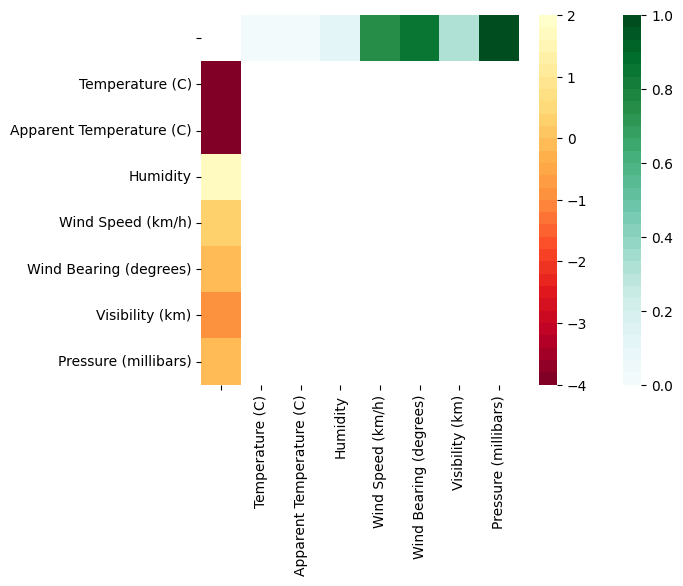

In [65]:
mask_first_column = np.zeros_like(df, dtype=bool)
mask_first_column[0, :] = True

mask_first_row = np.zeros_like(df, dtype=bool)
mask_first_row[:, 0] = True
positives = sns.color_palette("BuGn", 30)  
small_positives = plt.get_cmap('YlOrRd', 30).reversed()  
# Plot the heatmap with masks
sns.heatmap(data=df, mask=mask_first_row, cmap=positives, vmin=0, vmax=1)
sns.heatmap(data=df, mask=mask_first_column, cmap=small_positives, vmin=-4, vmax=2)

plt.show() 

--Wartości p (pierwszy wiersz): Wartości p mniejsze niż 0,05 sugerują, że różnice między warunkami pogodowymi w zimie a latem są istotne statystycznie dla danej kolumny.

--Statystyki t (pierwsza kolumna): Kolor czerwony wskazuje na ujemne wartości t, co oznacza, że średnia wartość dla zimy jest niższa niż dla lata. Kolor żółty oznacza dodatnie wartości t, co wskazuje, że średnia wartość dla zimy jest wyższa niż dla lata. Im jaśniejszy żółty kolor, tym większa różnica między średnimi.


In [66]:
t_p_mean=t_p_values.copy()

#### 2.WIZUALIZACJA - TEST BARTLETTA/LEVENA

kod przeprowadza test na równość wariancji (homoskedastyczność) dla danych pogodowych z sezonu letniego i zimowego. Głównym celem takiego testu jest sprawdzenie, czy obie grupy danych mają równą wariancję. 

C:\Users\ewelina.trybulowska\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Odrzucamy H0 dla kolumny Temperature (C) używając testu Levene. Istnieje istotna różnica między wariancją w miesiącach zimowych a wariancją w miesiącach letnich.
Odrzucamy H0 dla kolumny Apparent Temperature (C) używając testu Levene. Istnieje istotna różnica między wariancją w miesiącach zimowych a wariancją w miesiącach letnich.
Odrzucamy H0 dla kolumny Humidity używając testu Levene. Istnieje istotna różnica między wariancją w miesiącach zimowych a wariancją w miesiącach letnich.
Odrzucamy H0 dla kolumny Wind Speed (km/h) używając testu Levene. Istnieje istotna różnica między wariancją w miesiącach zimowych a wariancją w miesiącach letnich.
Odrzucamy H0 dla kolumny Wind Bearing (degrees) używając testu Levene. Istnieje istotna różnica między wariancją w miesiącach zimowych a wariancją w miesiącach letnich.
Odrzucamy H0 dla kolumny Visibility (km) używając testu Levene. Istnieje istotna różnica między wariancją w miesiącach zimowych a wariancją w miesiącach letnich.
Odrzucamy H0 dla 

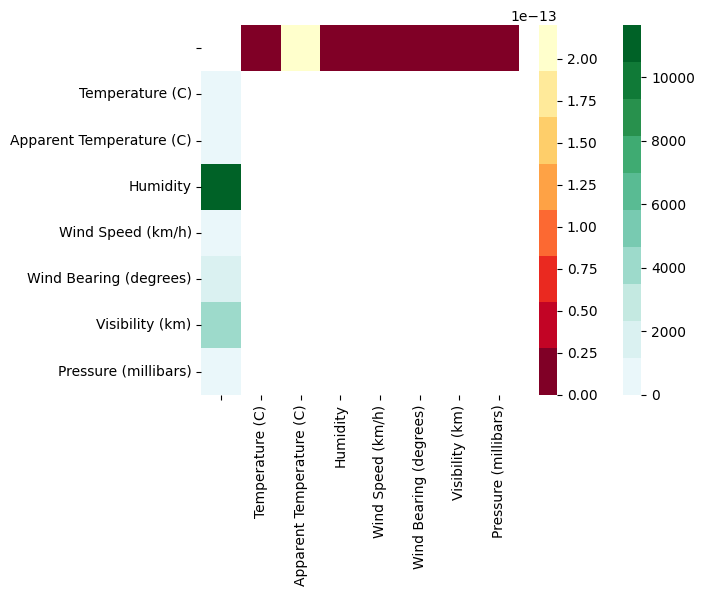

In [67]:
winter_data = data[data['Month'].isin([12, 1, 2])]  
summer_data = data[data['Month'].isin([6, 7, 8])]  

alpha = 0.05  
columns_to_test = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']  
t_stats = []  
t_p_values = []  
  
# H0: variance of summer_data = variance of winter_data  
# H1: variance of summer_data != variance of winter_data  
for column in columns_to_test:  
    summer_sample = summer_data[column]  
    winter_sample = winter_data[column]  
  
    summer_normal = stats.shapiro(summer_sample)[1] > alpha  
    winter_normal = stats.shapiro(winter_sample)[1] > alpha  
  
    if summer_normal and winter_normal:  
        # Use Bartlett's test if both distributions are normal  
        stat, p_value = stats.bartlett(summer_sample, winter_sample)  
        test_name = 'Bartlett'  
    else:  
        # Use Levene's test if either distribution is not normal  
        stat, p_value = stats.levene(summer_sample, winter_sample)  
        test_name = 'Levene'  
  
    t_stats.append(stat)  
    t_p_values.append(p_value)
    if p_value < 0.05:
        print(
            f"Odrzucamy H0 dla kolumny {column} używając testu {test_name}. Istnieje istotna różnica między wariancją w miesiącach zimowych a wariancją w miesiącach letnich.")
    else:
        print(
            f"Nie ma podstaw do odrzucenia H0 dla kolumny {column} na podstawie testu {test_name}. Nie ma istotnej różnicy między wariancją w miesiącach zimowych a wariancją w miesiącach letnich.") 

t_stats = np.array(t_stats).reshape(1, -1)  
t_p_values = np.array(t_p_values).reshape(-1, 1)  
  
x = np.zeros((len(columns_to_test) + 1, len(columns_to_test) + 1))  
x[0, 1:] = t_p_values.T  
x[1:, 0] = t_stats  
x[1:, 1:] = np.nan  
  
df = pd.DataFrame(x, columns=[''] + relevant_columns, index=[''] + relevant_columns)  
# column_names = [''] + columns_to_test  
# df.columns = column_names  

df1_new = df.copy()  
df1_new.iloc[0, 1:] = False  
df1_new.iloc[1:, 0] = True  
df1_new.iloc[1:, 1:] = True
df1_new.iloc[0,0]=True  
  
df2_new = df.copy()  
df2_new.iloc[0, 1:] = True  
df2_new.iloc[1:, 0] = False  
df2_new.iloc[1:, 1:] = True
df2_new.iloc[0,0]=True 
  
positives = sns.color_palette("BuGn", 10)  
small_positives = plt.get_cmap('YlOrRd', 8).reversed()  
  
sns.heatmap(data=df, mask=(df2_new), cmap=positives, vmin=0, vmax=11640)  
sns.heatmap(data=df, mask=(df1_new), cmap=small_positives, vmin=0, vmax=2.199094977667925e-13)  
  
plt.show()  


Interpretacja mapy ciepła:
--p (pierwszy wiersz): Jeśli wartość p < alpha (0,05), odrzucamy hipotezę zerową (H0: wariancja danych letnich = wariancja danych zimowych) i przyjmujemy hipotezę alternatywną (H1: wariancja danych letnich ≠ wariancja danych zimowych). Oznacza to, że różnice między wariancjami są istotne statystycznie.
--Statystyki testowe (pierwsza kolumna): Im większa wartość statystyki testowej, tym większa różnica między wariancjami, co prowadzi do mniejszej wartości p.

#### 3.WIZUALIZACJA  - porównanie jednocześnie średnich i wariancji pomiędzy miesiącami letnimi a zimowymi

W przypadku tego kodu, mapa ciepła pomaga ocenić istotność statystyczną różnic między średnimi wartościami oraz równość wariancji dla różnych kolumn danych pogodowych zebranych dla lata i zimy. 

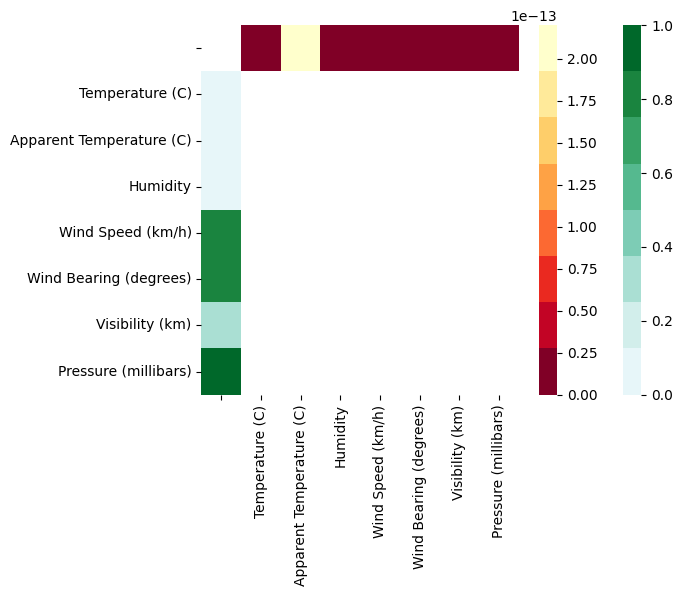

In [26]:
t_p_val = t_p_values.reshape(7) 
x = np.zeros((len(columns_to_test) + 1, len(columns_to_test) + 1))
x[0,1:]=t_p_val
x[1:,0]=t_p_mean
x[1:,1:]=np.nan
x[0,0]=np.nan
df = pd.DataFrame(x, columns=[''] + relevant_columns, index=[''] + relevant_columns)

positives = sns.color_palette("BuGn",20)
small_positives = plt.get_cmap('YlOrRd',20).reversed()

mask_first_column = np.zeros_like(df, dtype=bool)
mask_first_column[0, :] = True

mask_first_row = np.zeros_like(df, dtype=bool)
mask_first_row[:, 0] = True
positives = sns.color_palette("BuGn", 8)  
small_positives = plt.get_cmap('YlOrRd', 8).reversed()  
# Plot the heatmap with masks
sns.heatmap(data=df, mask=mask_first_column, cmap=positives, vmin=0, vmax=1)
sns.heatmap(data=df, mask=mask_first_row, cmap=small_positives, vmin=0, vmax=2.199095e-13)

plt.show() 

--Wartości p z testu t-Studenta w pierwszej kolumnie: Jeśli wartość p < alpha (0,05), odrzucamy hipotezę zerową (H0: średnia wartość danych letnich = średnia wartość danych zimowych) i przyjmujemy hipotezę alternatywną (H1: średnia wartość danych letnich ≠ średnia wartość danych zimowych). Oznacza to, że różnice między średnimi wartościami są istotne statystycznie dla danej kolumny.

--wartość p z testów równości wariancji (test Bartletta lub testu Levene'a) w pierwszym wierszu


#### TEST NORMALNOŚCI 

In [68]:
anderson_stat_t=[]
anderson_critical_value_t=[]
for column in ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'] :
    sample = data[column]
    anderson_stat = stats.anderson(sample).statistic
    anderson_stat_t.append(anderson_stat)
    anderson_critical_value = stats.anderson(sample).critical_values[2]
    anderson_critical_value_t.append(anderson_critical_value)
    if anderson_stat > anderson_critical_value:
        print(
            f"Odrzucamy H0 dla kolumny {column}. Rozkład danych nie jest normalny (metoda Anderson-Darling).")
    else:
        print(
            f"Nie ma podstaw do odrzucenia H0 dla kolumny {column}. Rozkład danych jest normalny (metoda Anderson-Darling).")

Odrzucamy H0 dla kolumny Temperature (C). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Apparent Temperature (C). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Humidity. Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Wind Speed (km/h). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Wind Bearing (degrees). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Visibility (km). Rozkład danych nie jest normalny (metoda Anderson-Darling).
Odrzucamy H0 dla kolumny Pressure (millibars). Rozkład danych nie jest normalny (metoda Anderson-Darling).


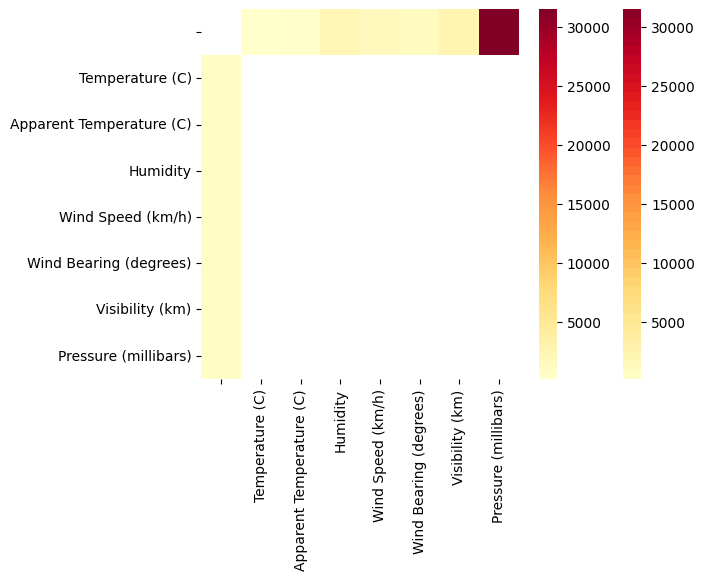

In [69]:
x = np.zeros((len(columns_to_test) + 1, len(columns_to_test) + 1))
x[0,1:]=anderson_stat_t
x[1:,0]=anderson_critical_value_t
x[1:,1:]=np.nan
x[0,0]=np.nan
df = pd.DataFrame(x, columns=[''] + relevant_columns, index=[''] + relevant_columns)

positives = sns.color_palette("YlOrRd",40)
small_positives = plt.get_cmap('YlOrRd',6000)

mask_first_column = np.zeros_like(df, dtype=bool)
mask_first_column[0, :] = True

mask_first_row = np.zeros_like(df, dtype=bool)
mask_first_row[:, 0] = True

# Plot the heatmap with masks
sns.heatmap(data=df, mask=mask_first_column, cmap=positives, vmin=202, vmax=31504) #anderson_critical_value_t
sns.heatmap(data=df, mask=mask_first_row, cmap=small_positives, vmin=202, vmax=31504)

plt.show() 